# Test Performance for XGBoost Classification Model

In [125]:
X = tree_raw.drop('loan_status',axis=1)
y = tree_raw['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

In [ ]:
xg = xgb.XGBClassifier(eta = 0.15,max_depth = 6,min_child_weight=4,gamma=1.6,colsample_bytree=0.9,subsample=0.6,reg_alpha=0.2,reg_lambda=1)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train,y_train = oversampler.fit_resample(X_train,y_train)
xg.fit(X_train,y_train)
xg_calibration = CalibratedClassifierCV(xg, cv=5, method='sigmoid')
xg_calibration.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.83      0.65      0.72    104291
           1       0.44      0.67      0.54     43705

    accuracy                           0.65    147996
   macro avg       0.64      0.66      0.63    147996
weighted avg       0.71      0.65      0.67    147996



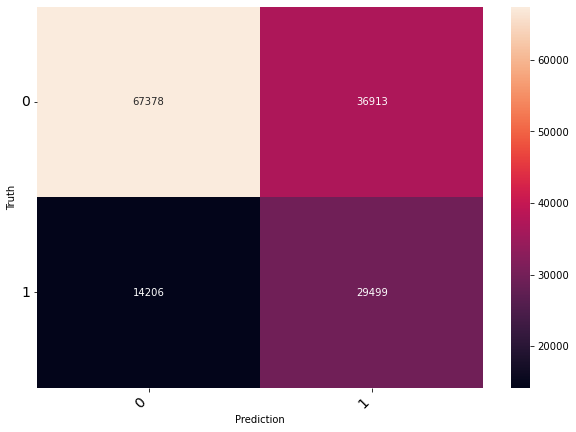

In [129]:
y_pred = xg.predict(X_test)
confusion_matrixs = confusion_matrix(y_test,y_pred)
print_confusion_matrix(confusion_matrixs,['0','1'])
print(classification_report(y_test,y_pred))

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


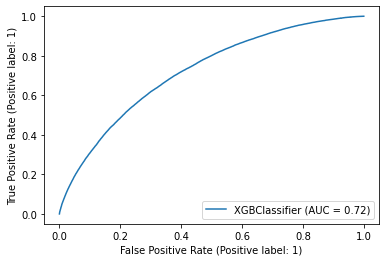

In [130]:
plot_roc_curve(xg,X_test,y_test )

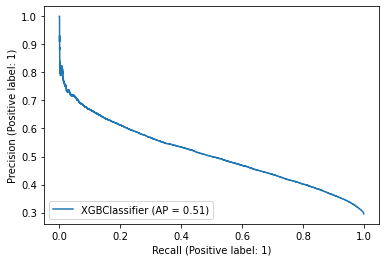

In [131]:
display = PrecisionRecallDisplay.from_estimator(xg, X_test, y_test)